In [1]:
%run moudle/pre_process
%run moudle/segment

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



Populating the interactive namespace from numpy and matplotlib


In [3]:
src_data=open("data/position.txt")
corpus=src_data.read().split('\n')


position_num=1000
dutys=[]
for item in corpus[:position_num]:
    position=position_vec_all(item)
    if position:
        if position[4]:
            dutys.append(position[4])
            
            

In [4]:

duty_seg=[]
for duty in dutys:
    text=text_segment(duty,20)
    duty_seg.append(text)
    



Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
Loading model cost 1.622 seconds.
DEBUG:jieba:Loading model cost 1.622 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
vectorizer = TfidfVectorizer(min_df=0.002,max_df=0.05, decode_error='ignore')
X = vectorizer.fit_transform(duty_seg)
X=X.toarray()

print X.shape
print len(duty_seg)


(1000, 947)
1000


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


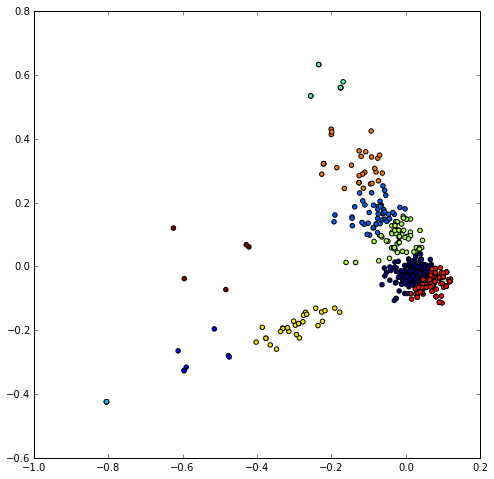

In [6]:
num_clusters=10

from sklearn.cluster import MiniBatchKMeans
km = KMeans(n_clusters=num_clusters, random_state=3)
# km = MiniBatchKMeans(n_clusters=num_clusters, n_init=1, random_state=3)


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca_X=pca.fit_transform(X)
plt.figure(figsize=(8, 8))

pca_Y= km.fit_predict(pca_X)
scatter(pca_X[:, 0], pca_X[:, 1], c=pca_Y)

0
cpa cpacfa ipo pe vc wind xx 人力 传媒 例如 保险 债券 写作能力 创作 化工 医疗 医药 司法考试 名牌大学 名称 四大 定量分析 对话 工程 广告 开具 微信 心理学 投行 提案 搜索 撰稿 数据分析 数据库 文案 文献 本次 机械 此次 法律文书 法律法规 王芳 理工科 生物 电子信息 硬件 管理学 经济学 统计 行政 财务会计 资源管理 趋势 转为 金融学 金融管理 非年 韧性 项目分析 
1
cpacfa html pe photoshop vc 上海市 代销 会计统计 住宿 保险 信托 公开 劳动合同 四级 团体 外勤 好能 审计 客户群 工程 市场营销 开具 律师资格 成果 战略 报表 政策 数据库 期货 期货市场 本行业 模式 每月 法律法规 演讲 理财 理财师 电脑操作 私募 税务 策划 股权 证券化 财务会计 财务管理 财务软件 财经 财经新闻 账目 资产 路径 销售 领导力 领悟力 风险 
2
个人简历 以内 保险 偶尔 券商 卖方 实业 市场策划 市场营销 心理学 推广 支付 有意 直销 策划 经济学 统计 营销学 财务会计 违法违纪 金融学 销售 风险意识 饱满 
3
保险 券商 工程 市场营销 理工科 经济学 统计 证券公司 金融学 
4
cfa cpa 作风 保险公司 信托 信贷 信贷风险 公开 利益 历史 处置 审计 年薪 应对 房地产 手段 投融资 投资决策 政策 构建 模型 法律法规 管控 管理系统 管理者 经济学 绩效 股权 评估 财经 账户 资产 资本运作 金融学 零售 风险 风险意识 风险管理 
5
cpa cpacfa 事务所 保险 信托 信贷风险 全程 券商 医疗 即可 司法考试 地产 基本功 工程 市场营销 房地产 投研 投行 收益 政策 数据分析 文案 法律法规 物流 理财师 男岁 相同 私募 管理学 级别 经济学 统计 证券化 财会 财务管理 资产 资管 过程 金融学 金融资产 销售 韧性 项目分析 风险管理 
6
cet cpa cpacfa sql vbamatlab 严格考核 企业会计 伙伴 会计核算 作业 健康 六级 分行 分配 包装 发放 司法考试 国际金融 坚韧不拔 基本功 境外 天能 定价 审计 客户关系 对待 工程 微信 微博 战略 房地产 打字速度 挖掘 接洽 推

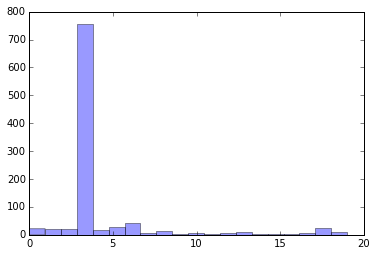

In [9]:
from sklearn.cluster import KMeans,MiniBatchKMeans
n_components=10
num_clusters=20
km = KMeans(n_clusters=num_clusters, random_state=3)

clustered = km.fit(X)
Y=clustered.predict(X)
plt.hist(Y,bins=num_clusters,facecolor='blue', alpha=0.4)
def get_key_words(matrix,i,min_df):
    key_words=""
    select=matrix[i]>min_df
    for idx in np.arange(length)[select]:
        key_words=key_words+word_list[idx]+" "
    print key_words
    
word_list=vectorizer.get_feature_names()
length=X.shape[1]  
for i in range(num_clusters):
    print i
    get_key_words(km.cluster_centers_,i,0.01)

(array([  22.,   19.,   22.,  754.,   16.,   29.,   41.,    8.,   14.,
           2.,    8.,    2.,    7.,    9.,    3.,    4.,    2.,    6.,
          23.,    9.]),
 array([  0.  ,   0.95,   1.9 ,   2.85,   3.8 ,   4.75,   5.7 ,   6.65,
          7.6 ,   8.55,   9.5 ,  10.45,  11.4 ,  12.35,  13.3 ,  14.25,
         15.2 ,  16.15,  17.1 ,  18.05,  19.  ]),
 <a list of 20 Patch objects>)

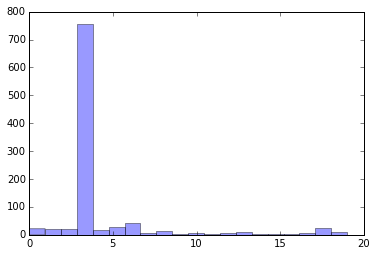

In [11]:
Y=clustered.predict(X)
plt.hist(Y,bins=num_clusters,facecolor='blue', alpha=0.4)